## Quantitative analysis using pynance and TaLib

#### Load yfinance dataset

Fetch Financial Data

We can use `PyNance` to fetch historical stock data. 


In [52]:
import sys, os
import pandas as pd
# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from fetch_stock_data import fetch_historical_data

# extract multiple datasets  and concatenate in one dataset for analysis
# List of stocks
stocks = ['AAPL','AMZN','GOOG','META', 'MSFT', 'NVDA','TSLA']
# Fetch historical data for list of stocks

 # Fetch data for AAPL, GOOGL, and MSFT, etc
df = fetch_historical_data(stocks, start_date='2010-01-01', end_date='2023-01-01')
    
# Explore the results
df.head()

,Open,High,Low,Close,Volume,stock
Date,,,,,,
2022-12-30,128.41,129.9500,127.43,129.93,77034209.0,AAPL
2022-12-29,127.99,130.4814,127.73,129.61,75703710.0,AAPL
2022-12-28,129.67,131.0275,125.87,126.04,85438391.0,AAPL
2022-12-27,131.38,131.4100,128.72,130.03,69007830.0,AAPL
2022-12-23,130.92,132.4150,129.64,131.86,63814893.0,AAPL


In [53]:
# check the size of the dataset
df.shape

(21119, 6)

In [54]:
# check missing values
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
stock     0
dtype: int64

In [55]:
# check the data types
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
stock      object
dtype: object

In [56]:
# check duplicates

df.duplicated().sum()

0

## Apply Analysis Indicators with TA-Lib
Here we can use `TA-Lib` to calculate various technical indicators such as moving averages, RSI (Relative Strength Index), and MACD (Moving Average Convergence Divergence)


In [57]:
# Import ta-lib library
import talib


Applying Technical Indicators

In [58]:

# Moving Averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)

In [59]:
# Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

In [60]:
# Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], 
                                                            fastperiod=12, 
                                                            slowperiod=26, 
                                                            signalperiod=9)

In [61]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
stock           0
SMA_20         19
EMA_20         19
RSI_14         14
MACD           33
MACD_Signal    33
MACD_Hist      33
dtype: int64

Seeing `NaN` values in the first few rows of the indicators is expected due to the look-back period required for calculation. We can choose to drop those rows, fill them, or handle them according to our analysis needs.

Daily Returns

In [62]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

print(df[['Close', 'Daily_Return']].head(30))


             Close  Daily_Return
Date                            
2022-12-30  129.93           NaN
2022-12-29  129.61     -0.002463
2022-12-28  126.04     -0.027544
2022-12-27  130.03      0.031657
2022-12-23  131.86      0.014074
2022-12-22  132.23      0.002806
2022-12-21  135.45      0.024352
2022-12-20  132.30     -0.023256
2022-12-19  132.37      0.000529
2022-12-16  134.51      0.016167
2022-12-15  136.50      0.014794
2022-12-14  143.21      0.049158
2022-12-13  145.47      0.015781
2022-12-12  144.49     -0.006737
2022-12-09  142.16     -0.016126
2022-12-08  142.65      0.003447
2022-12-07  140.94     -0.011987
2022-12-06  142.91      0.013978
2022-12-05  146.63      0.026030
2022-12-02  147.81      0.008047
2022-12-01  148.31      0.003383
2022-11-30  148.03     -0.001888
2022-11-29  141.17     -0.046342
2022-11-28  144.22      0.021605
2022-11-25  148.11      0.026973
2022-11-23  151.07      0.019985
2022-11-22  150.18     -0.005891
2022-11-21  148.01     -0.014449
2022-11-18

Cumulative Returns

In [63]:
# Calculate cumulative returns
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

print(df[['Close', 'Cumulative_Return']].head(30))


             Close  Cumulative_Return
Date                                 
2022-12-30  129.93                NaN
2022-12-29  129.61           0.997537
2022-12-28  126.04           0.970061
2022-12-27  130.03           1.000770
2022-12-23  131.86           1.014854
2022-12-22  132.23           1.017702
2022-12-21  135.45           1.042484
2022-12-20  132.30           1.018241
2022-12-19  132.37           1.018779
2022-12-16  134.51           1.035250
2022-12-15  136.50           1.050566
2022-12-14  143.21           1.102209
2022-12-13  145.47           1.119603
2022-12-12  144.49           1.112060
2022-12-09  142.16           1.094128
2022-12-08  142.65           1.097899
2022-12-07  140.94           1.084738
2022-12-06  142.91           1.099900
2022-12-05  146.63           1.128531
2022-12-02  147.81           1.137613
2022-12-01  148.31           1.141461
2022-11-30  148.03           1.139306
2022-11-29  141.17           1.086508
2022-11-28  144.22           1.109982
2022-11-25  

In [70]:
# Save the clean data to csv in Data directory
df.to_csv('../Data/stock_data.csv')

## Data Visualization

Create visualizations to better understand the data and the impact of different indicators on the stock price.


In this visualization, we focus on testing the 'AAPL' stock price. However, the Streamlit app allows users to select and visualize other stocks using a dropdown menu

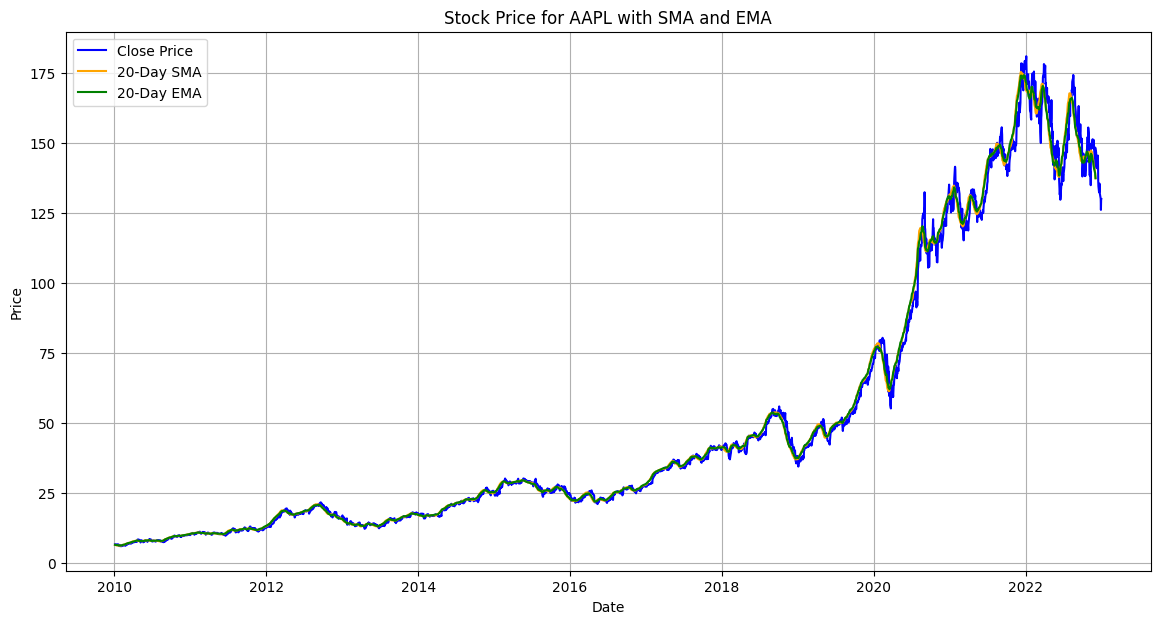

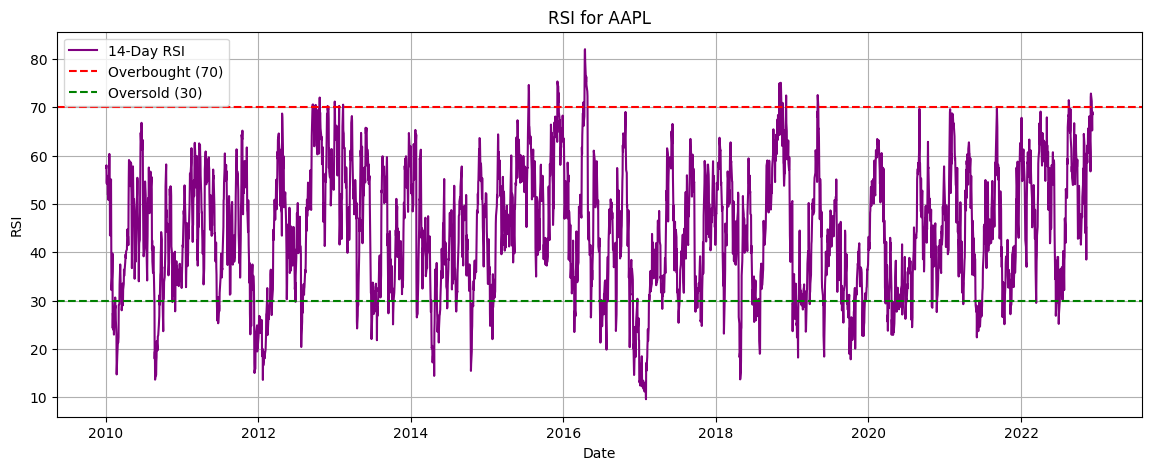

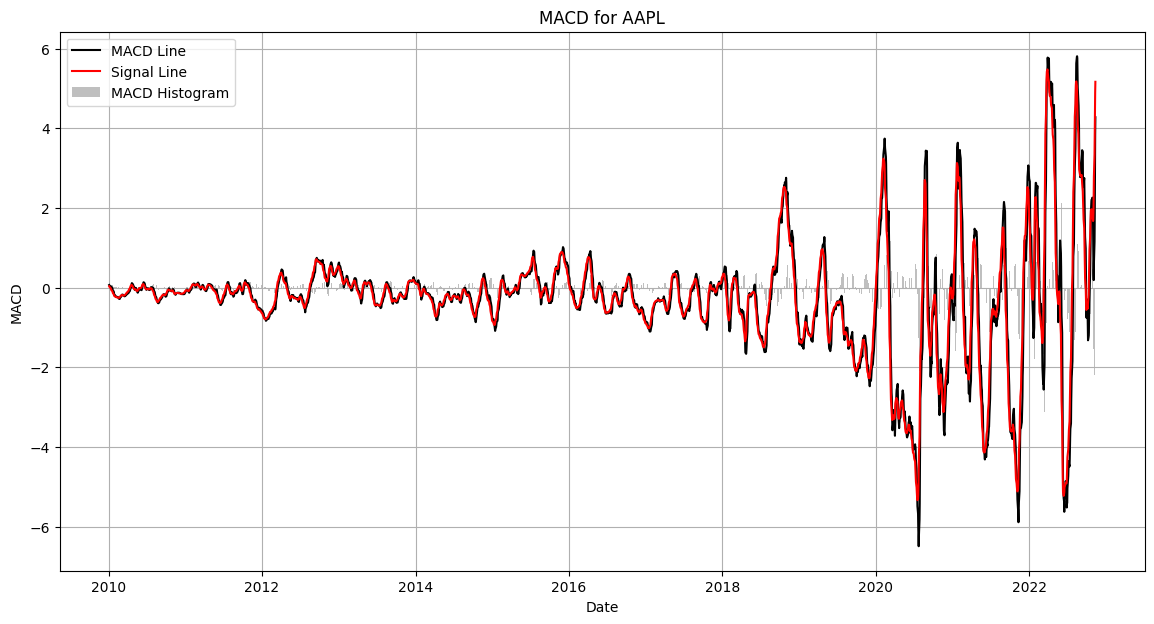

In [71]:
# Plotting
import matplotlib.pyplot as plt
from stock_analysis import load_data, plot_stock_data, plot_rsi, plot_macd
stock = 'AAPL'
fig = plot_stock_data(stock, df)
plt.show()

fig = plot_rsi(stock, df)
plt.show()

fig = plot_macd(stock, df)
plt.show()